In [3]:
import cv2
import os
import numpy as np
from operator import itemgetter
from glob import glob
from matplotlib import pyplot as plt

Reading reference image :  Data/Images/image_master.jpg
Reading image to align :  Data/Images/otie/image3.jpg
Aligning images ...
Perspective Warp Cordinates :  [[ 1.06668430e+00  3.64112990e-03 -2.50493634e+01]
 [ 1.60693487e-02  1.05441307e+00 -3.00532401e+01]
 [ 6.13209601e-05  4.50499875e-05  1.00000000e+00]]
Saving aligned image :  alignedimage.jpg


Text(0.5, 1.0, 'Aligned Image')

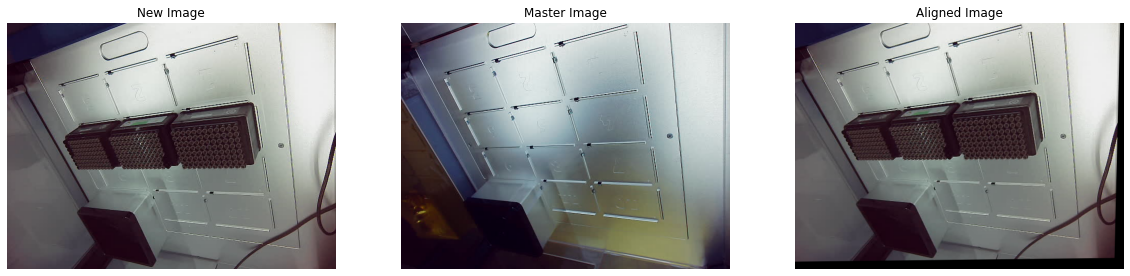

In [8]:
#Source: https://learnopencv.com/image-alignment-ecc-in-opencv-c-python/
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

def alignImages(im1, im2):

  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
    
  # Sort matches by score
  matches = sorted(matches, key=lambda x: x.distance)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)

  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))

  return im1Reg, h

if __name__ == '__main__':

  # Read reference image
  refFilename = "Data/Images/image_master.jpg"
  print("Reading reference image : ", refFilename)
  imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

  # Read image to be aligned
  imFilename = "Data/Images/otie/image3.jpg"
  print("Reading image to align : ", imFilename);
  im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

  print("Aligning images ...")
  # Registered image will be resotred in imReg.
  # The estimated homography will be stored in h.
  imReg, h = alignImages(im, imReference)
  print("Perspective Warp Cordinates : ",h)

  # Write aligned image to disk.
  outFilename = "alignedimage.jpg"
  print("Saving aligned image : ", outFilename);
  cv2.imwrite(outFilename, imReg)


 # Show final results
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 2)
plt.imshow(imReference)
plt.axis('off')
plt.title("Master Image")

fig.add_subplot(rows, columns, 1)
plt.imshow(im)
plt.axis('off')
plt.title("New Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(imReg)
plt.axis('off')
plt.title("Aligned Image")

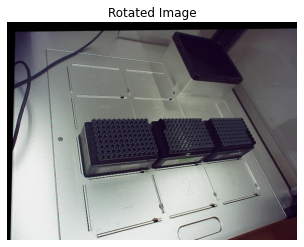

In [9]:
img_path = os.path.join('alignedimage.jpg')
img = cv2.imread(img_path)
# Converting image to proper color space
imgcc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Rotating image to be frontal
imgcc_rotated = cv2.rotate(imgcc, cv2.ROTATE_180)
plt.title('Rotated Image')
plt.axis('off')
plt.imshow(imgcc_rotated)

True

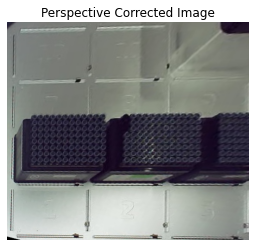

In [10]:
# Coordinates that you want to Perspective Transform
pts1 = np.float32([[118,80],[430,120],[175,490],[565,380]])
# Size of the Transformed Image
pts2 = np.float32([[0,0],[500,0],[0,450],[500,450]])

TransformArray = cv2.getPerspectiveTransform(pts1,pts2)
pci = cv2.warpPerspective(imgcc_rotated,TransformArray,(500,450))
plt.title('Perspective Corrected Image')
plt.imshow(pci)
plt.axis('off')
cv2.imwrite('correctedimage.jpg', pci)

In [11]:
# Coordinates of deck 1
pts_1 = np.float32([[0,330],[180,330],[0,450],[180,450]])
pts_2 = np.float32([[157,330],[337,330],[157,450],[337,450]])
pts_3 = np.float32([[320,330],[500,330],[320,450],[500,450]])
pts_4 = np.float32([[0,222],[180,222],[0,342],[180,342]])
pts_5 = np.float32([[157,222],[337,222],[157,342],[337,342]])
pts_6 = np.float32([[320,222],[500,222],[320,342],[500,342]])
pts_7 = np.float32([[0,115],[180,115],[0,235],[180,235]])
pts_8 = np.float32([[157,115],[337,115],[157,235],[337,235]])
pts_9 = np.float32([[320,115],[500,115],[320,235],[500,235]])
pts_10 = np.float32([[0,0],[180,0],[0,120],[180,120]])
pts_11 = np.float32([[157,0],[337,0],[157,120],[337,120]])

# 28x28 Target transform for ML data input
pts_t = np.float32([[0,0],[100,0],[0,100],[100,100]])

# Transforms
TransformDeck1 = cv2.getPerspectiveTransform(pts_1,pts_t)
Deck1 = cv2.warpPerspective(pci,TransformDeck1,(100,100))
TransformDeck2 = cv2.getPerspectiveTransform(pts_2,pts_t)
Deck2 = cv2.warpPerspective(pci,TransformDeck2,(100,100))
TransformDeck3 = cv2.getPerspectiveTransform(pts_3,pts_t)
Deck3 = cv2.warpPerspective(pci,TransformDeck3,(100,100))
TransformDeck4 = cv2.getPerspectiveTransform(pts_4,pts_t)
Deck4 = cv2.warpPerspective(pci,TransformDeck4,(100,100))
TransformDeck5 = cv2.getPerspectiveTransform(pts_5,pts_t)
Deck5 = cv2.warpPerspective(pci,TransformDeck5,(100,100))
TransformDeck6 = cv2.getPerspectiveTransform(pts_6,pts_t)
Deck6 = cv2.warpPerspective(pci,TransformDeck6,(100,100))
TransformDeck7 = cv2.getPerspectiveTransform(pts_7,pts_t)
Deck7 = cv2.warpPerspective(pci,TransformDeck7,(100,100))
TransformDeck8 = cv2.getPerspectiveTransform(pts_8,pts_t)
Deck8 = cv2.warpPerspective(pci,TransformDeck8,(100,100))
TransformDeck9 = cv2.getPerspectiveTransform(pts_9,pts_t)
Deck9 = cv2.warpPerspective(pci,TransformDeck9,(100,100))
TransformDeck10 = cv2.getPerspectiveTransform(pts_10,pts_t)
Deck10 = cv2.warpPerspective(pci,TransformDeck10,(100,100))
TransformDeck11 = cv2.getPerspectiveTransform(pts_11,pts_t)
Deck11 = cv2.warpPerspective(pci,TransformDeck11,(100,100))

Text(0.5, 1.0, 'Deck 11')

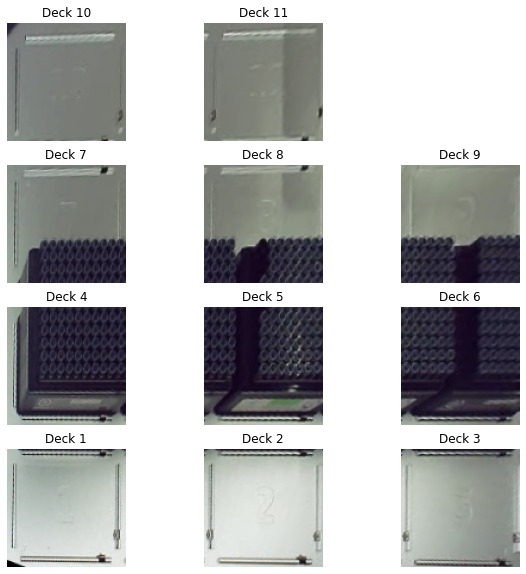

In [12]:
# code for displaying multiple images in one figur
  
# create figure
fig = plt.figure(figsize=(10, 10))
  
# setting values to rows and column variables
rows = 4
columns = 3
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(Deck1)
plt.axis('off')
plt.title("Deck 1")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 11)
  
# showing image
plt.imshow(Deck2)
plt.axis('off')
plt.title("Deck 2")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 12)
  
# showing image
plt.imshow(Deck3)
plt.axis('off')
plt.title("Deck 3")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Deck4)
plt.axis('off')
plt.title("Deck 4")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(Deck5)
plt.axis('off')
plt.title("Deck 5")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(Deck6)
plt.axis('off')
plt.title("Deck 6")

# Adds a subplot at the 7th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Deck7)
plt.axis('off')
plt.title("Deck 7")

# Adds a subplot at the 8th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Deck8)
plt.axis('off')
plt.title("Deck 8")

# Adds a subplot at the 9th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Deck9)
plt.axis('off')
plt.title("Deck 9")

# Adds a subplot at the 10th position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Deck10)
plt.axis('off')
plt.title("Deck 10")

# Adds a subplot at the 11th position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Deck11)
plt.axis('off')
plt.title("Deck 11")